<a href="https://colab.research.google.com/github/TimothyPanggabean/FaceDetection/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

# Import Unzip Package
import zipfile

# Unzip file
dataset_wajah = '/content/drive/MyDrive/face detection data/dataset.zip'
zip_ref = zipfile.ZipFile(dataset_wajah, 'r')
zip_ref.extractall()

Mounted at /content/drive


In [ ]:
temp_model = '/content/drive/MyDrive/face detection data/yolov5_10e.zip'
zip_ref = zipfile.ZipFile(temp_model, 'r')
zip_ref.extractall()

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14862, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14862 (delta 0), reused 1 (delta 0), pack-reused 14858
Receiving objects: 100% (14862/14862), 13.92 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (10231/10231), done.


In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 13.7 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 1.6 MB 69.7 MB/s 


# Training

In [ ]:
!python yolov5/train.py --img 640 --batch 16 --epochs 10
--data face_detection_dataset.yaml
--cfg yolov5/models/yolov5s.yaml

train: weights=yolov5/yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=face_detection_dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

In [ ]:
!zip -r yolov5_10e.zip yolov5/runs/train/exp3

  adding: yolov5/runs/train/exp3/ (stored 0%)
  adding: yolov5/runs/train/exp3/confusion_matrix.png (deflated 37%)
  adding: yolov5/runs/train/exp3/R_curve.png (deflated 17%)
  adding: yolov5/runs/train/exp3/PR_curve.png (deflated 25%)
  adding: yolov5/runs/train/exp3/weights/ (stored 0%)
  adding: yolov5/runs/train/exp3/weights/best.pt (deflated 9%)
  adding: yolov5/runs/train/exp3/weights/last.pt (deflated 9%)
  adding: yolov5/runs/train/exp3/results.csv (deflated 81%)
  adding: yolov5/runs/train/exp3/val_batch2_labels.jpg (deflated 13%)
  adding: yolov5/runs/train/exp3/hyp.yaml (deflated 45%)
  adding: yolov5/runs/train/exp3/val_batch1_pred.jpg (deflated 11%)
  adding: yolov5/runs/train/exp3/train_batch0.jpg (deflated 3%)
  adding: yolov5/runs/train/exp3/val_batch2_pred.jpg (deflated 13%)
  adding: yolov5/runs/train/exp3/train_batch2.jpg (deflated 3%)
  adding: yolov5/runs/train/exp3/val_batch0_labels.jpg (deflated 13%)
  adding: yolov5/runs/train/exp3/results.png (deflated 9%)
  ad

In [ ]:
! du -sh yolov5_10e.zip

31M	yolov5_10e.zip


# Testing

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp3/weights/best.pt --source 720p_tester_orang.mp4

detect: weights=['yolov5/runs/train/exp3/weights/best.pt'], source=720p_tester_orang.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-47-g2370a55 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/3493) /content/720p_tester_orang.mp4: 384x640 1 wajah, 14.0ms
video 1/1 (2/3493) /content/720p_tester_orang.mp4: 384x640 1 wajah, 8.7ms
video 1/1 (3/3493) /content/720p_tester_orang.mp4: 384x640 1 wajah, 8.8ms
video 1/1 (4/3493) /content/720p_tester_orang.mp4: 384x640 (no detections), 8.5ms
video 1/1 (5/349

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp3/weights/best.pt --source 'Testing/sby/testing' --project 'Results/sby' --name 'testing'

detect: weights=['yolov5/runs/train/exp3/weights/best.pt'], source=Testing/jokowi/testing/presiden-jokowi-saat-memberikan-keterangan-pers-terkait-pelantikan-kpu_220412182436-629.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-21-ga1b6e79 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Testing/jokowi/testing/presiden-jokowi-saat-memberikan-keterangan-pers-terkait-pelantikan-kpu_220412182436-629.jpg: 416x640 1 wajah, 11.2ms
Speed: 0.4ms pre-process, 11.2ms inference, 1.3ms NMS per image at sha

In [ ]:
# Unzip file
data_testing = '/content/drive/MyDrive/dataset-fr.zip'
zip_ref = zipfile.ZipFile(data_testing, 'r')
zip_ref.extractall(path='Testing')

In [ ]:
!zip -r Results.zip Results

  adding: Results/ (stored 0%)
  adding: Results/jokowi/ (stored 0%)
  adding: Results/jokowi/2.jpg (deflated 4%)
  adding: Results/jokowi/testing/ (stored 0%)
  adding: Results/jokowi/testing/images.jpg (deflated 4%)
  adding: Results/jokowi/testing/0914553-jokowi-bagikan-kjs-620X310.jpg (deflated 3%)
  adding: Results/jokowi/testing/jokowi_Ende.jpg (deflated 2%)
  adding: Results/jokowi/testing/presiden-jokowi-saat-memberikan-keterangan-pers-terkait-pelantikan-kpu_220412182436-629.jpg (deflated 4%)
  adding: Results/jokowi/testing/2443721.jpg (deflated 3%)
  adding: Results/jokowi/1.jpeg (deflated 3%)
  adding: Results/sandiaga uno/ (stored 0%)
  adding: Results/sandiaga uno/sandi_single.png (deflated 1%)
  adding: Results/sandiaga uno/testing/ (stored 0%)
  adding: Results/sandiaga uno/testing/2967298871.jpg (deflated 5%)
  adding: Results/sandiaga uno/testing/60819d99a708b.jpg (deflated 3%)
  adding: Results/sandiaga uno/testing/0419_010803_6f91_inilah.com_.jpg (deflated 3%)
  addi

In [ ]:
! du -sh Results.zip

9.7M	Results.zip


# Inference and Get Bounding Box

In [ ]:
# Import data dari drive/upload manual

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

# Import Unzip Package
import zipfile

# Unzip file
trained_model = '/content/drive/MyDrive/face detection data/yolov5_10e.zip'
zip_ref = zipfile.ZipFile(trained_model, 'r')
zip_ref.extractall()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-27 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1280x1920 19 wajahs
Speed: 27.2ms pre-process, 3268.4ms inference, 39.5ms NMS per image at shape (1, 3, 448, 640)


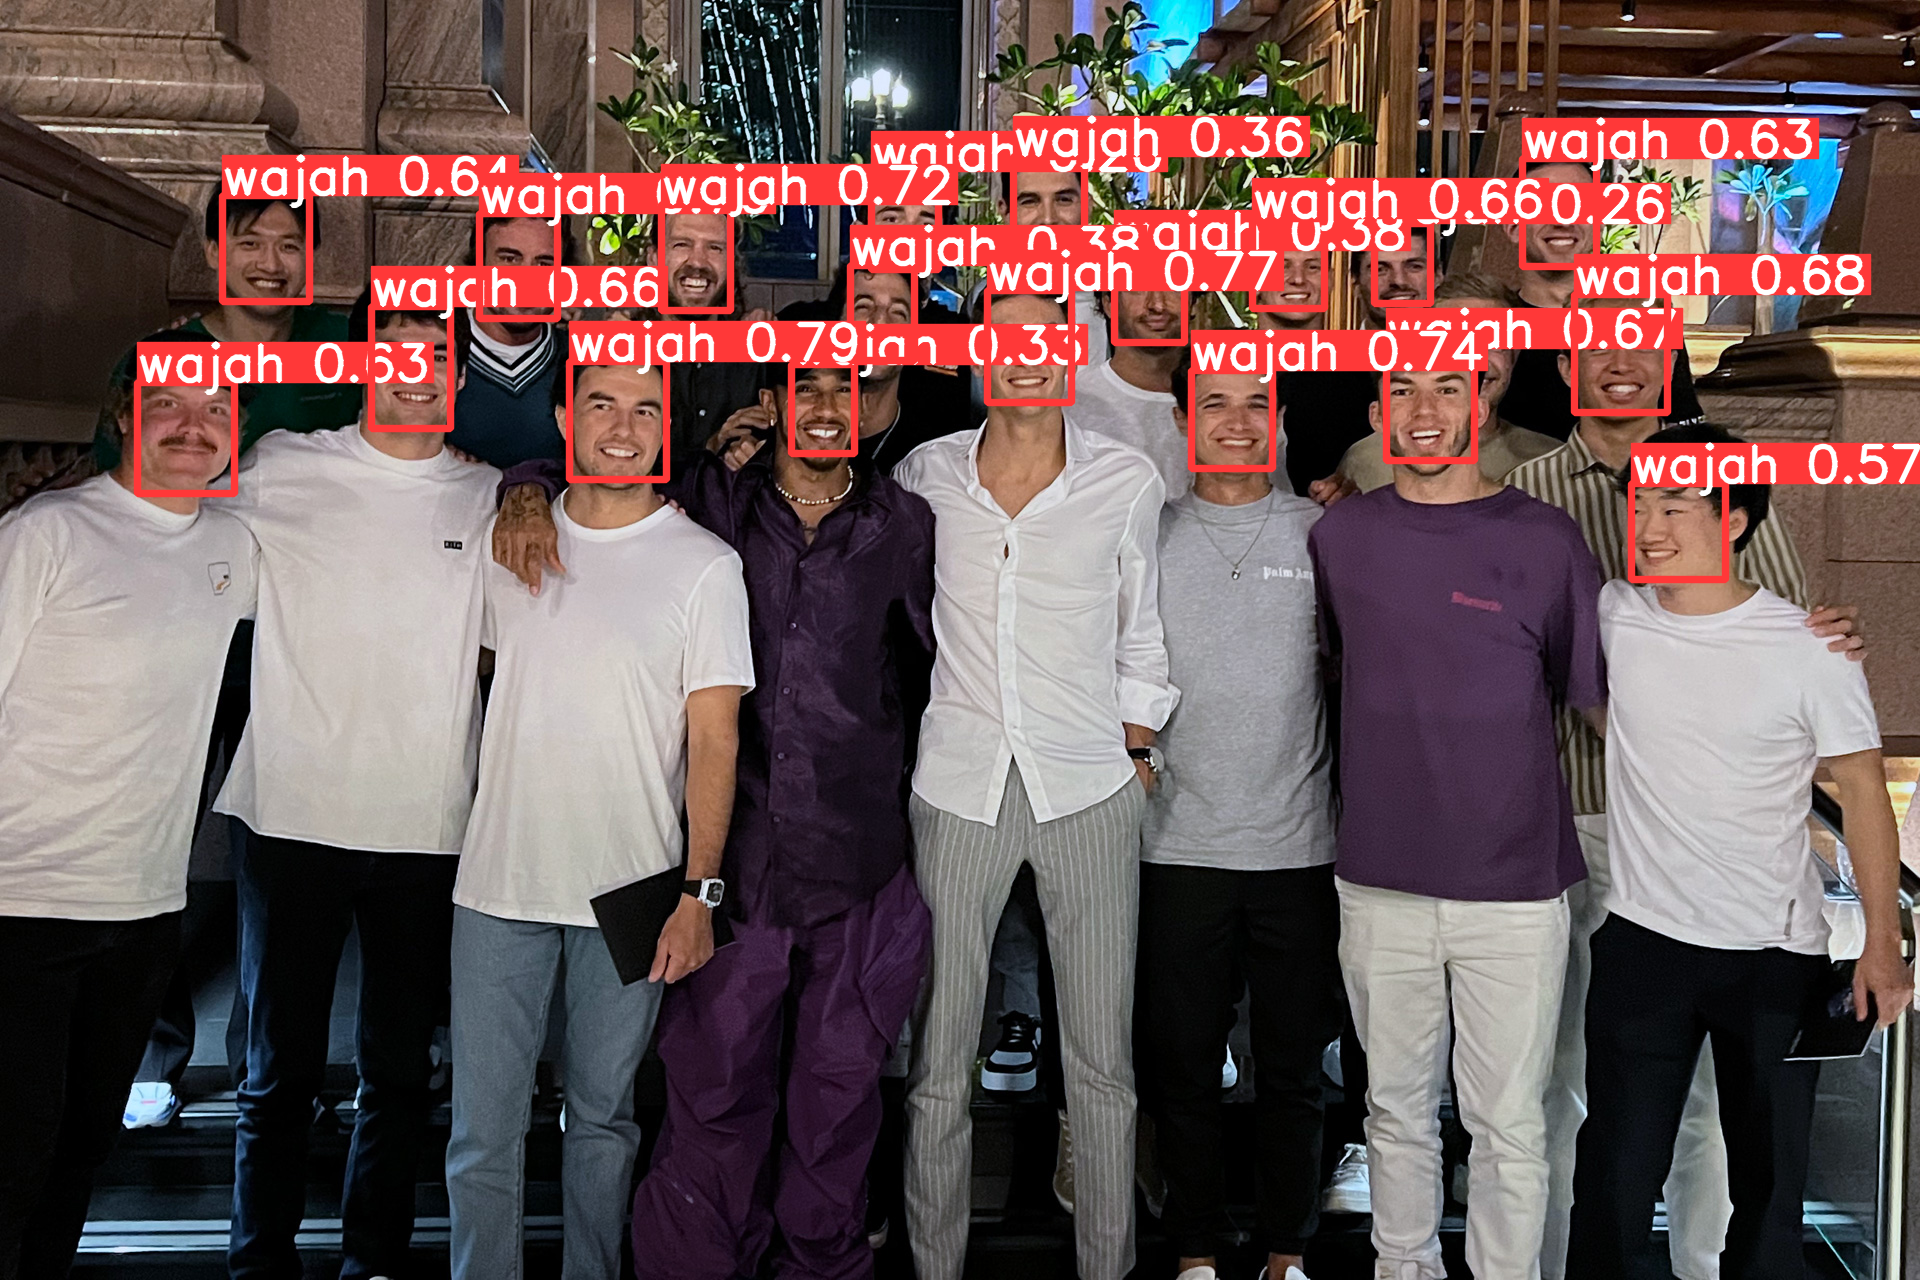

Saved 1 image to runs/detect/exp



 tensor([[5.69684e+02, 3.61920e+02, 6.66113e+02, 4.79431e+02, 7.86525e-01, 0.00000e+00],
        [9.87281e+02, 2.90169e+02, 1.07179e+03, 4.02203e+02, 7.68506e-01, 0.00000e+00],
        [1.19186e+03, 3.70082e+02, 1.27299e+03, 4.68271e+02, 7.40813e-01, 0.00000e+00],
        [6.61555e+02, 2.04621e+02, 7.30870e+02, 3.10562e+02, 7.21409e-01, 0.00000e+00],
        [4.79517e+02, 2.13341e+02, 5.57030e+02, 3.18774e+02, 6.99204e-01, 0.00000e+00],
        [1.57486e+03, 2.94546e+02, 1.66772e+03, 4.12488e+02, 6.81882e-01, 0.00000e+00],
        [1.38619e+03, 3.48715e+02, 1.47465e+03, 4.60333e+02, 6.74055e-01, 0.00000e+00],
        [3.71146e+02, 3.06647e+02, 4.50126e+02, 4.28248e+02, 6.60542e-01, 0.00000e+00],
        [1.25241e+03, 2.18505e+02, 1.32442e+03, 3.08142e+02, 6.56894e-01, 0.00000e+00],
        [2.22649e+02, 1.95591e+02, 3.09177e+02, 3.01328e+02, 6.43799e-01, 0.00000e+00],
        [1.37975e+02, 3.82541e+02, 2.34284e+02, 4.93165e+02, 6.32871e-01, 0.00000e+00],
        [1.52219e+03, 1.58538e

In [ ]:
import cv2
import torch
from PIL import Image

# Upload model, sesuaikan pathnya
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

# Ubah ama file gambar yang mau di inference
img = cv2.imread('tes_muka.jpg')[:, :, ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model(img, size=640)  # includes NMS

# Results
results.print()  # print results to screen
results.show()  # display results
results.save()  # save as results1.jpg, results2.jpg... etc.

# Data
print('\n', results.xyxy[0])  # print img1 predictions
#          x1 (pixels)  y1 (pixels)  x2 (pixels)  y2 (pixels)   confidence        class
# tensor([[7.47613e+02, 4.01168e+01, 1.14978e+03, 7.12016e+02, 8.71210e-01, 0.00000e+00],
#         [1.17464e+02, 1.96875e+02, 1.00145e+03, 7.11802e+02, 8.08795e-01, 0.00000e+00],
#         [4.23969e+02, 4.30401e+02, 5.16833e+02, 7.20000e+02, 7.77376e-01, 2.70000e+01],
#         [9.81310e+02, 3.10712e+02, 1.03111e+03, 4.19273e+02, 2.86850e-01, 2.70000e+01]])

In [ ]:
# Ambil bounding box dari hasil inference
# bottom=y1; left=x1; right=x2; top=y2

coordinates={}

for i in range (len(results.xyxy[0])):
  coordinates[i] = {"bottom":float(results.xyxy[0][i][1]),
                    "left":float(results.xyxy[0][i][0]),
                    "right":float(results.xyxy[0][i][2]),
                    "top":float(results.xyxy[0][i][3])}

print(coordinates)

{0: {'bottom': 361.92047119140625, 'left': 569.6838989257812, 'right': 666.1129150390625, 'top': 479.43096923828125}, 1: {'bottom': 290.1687927246094, 'left': 987.2807006835938, 'right': 1071.7880859375, 'top': 402.20318603515625}, 2: {'bottom': 370.0819396972656, 'left': 1191.8558349609375, 'right': 1272.99365234375, 'top': 468.27142333984375}, 3: {'bottom': 204.62142944335938, 'left': 661.5550537109375, 'right': 730.8697509765625, 'top': 310.56195068359375}, 4: {'bottom': 213.341064453125, 'left': 479.51739501953125, 'right': 557.0299682617188, 'top': 318.77447509765625}, 5: {'bottom': 294.5457763671875, 'left': 1574.8642578125, 'right': 1667.72216796875, 'top': 412.48773193359375}, 6: {'bottom': 348.7146911621094, 'left': 1386.19140625, 'right': 1474.6474609375, 'top': 460.3329162597656}, 7: {'bottom': 306.6474304199219, 'left': 371.1457214355469, 'right': 450.12615966796875, 'top': 428.24810791015625}, 8: {'bottom': 218.50465393066406, 'left': 1252.4053955078125, 'right': 1324.4218